In [0]:
#importing the required libraries:  
import numpy as np
import cv2
import random as rd
import math
import os
import matplotlib.pyplot as plt

In [0]:
#converting the images into greyscale:
image_data=cv2.imread('u2cuba.jpg')
gray_image = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)

kernel=[[1,1,1],[1,1,1],[1,1,1]]

In [0]:
#strategy for dealing with image borders ->padding the image by amount which it gets reduced in correaltion:
def padding(Input,kernel):
  pad=np.zeros((Input.shape[0]+kernel.shape[0]-1,Input.shape[1]+kernel.shape[1]-1))
 
  for i in range(kernel.shape[0],Input.shape[0]+kernel.shape[0]-1):
    for j in range(kernel.shape[1],Input.shape[1]+kernel.shape[1]-1):
      pad[i][j]=Input[i-kernel.shape[0]][j-kernel.shape[1]]
  
  ans=pad
  return ans


In [0]:
#convolution function:same as correlation but flipping the kernel in both sides:
def my_conv2(Input,kernel):
  Conv=list()
  kernel=np.rot90(kernel,2)
  Input=padding(Input,kernel)
  for i in range(0,Input.shape[0]-kernel.shape[0]+1):
    r=list()
    S=0
    for j in range(0,Input.shape[1]-kernel.shape[1]+1): 
      S=np.sum(np.multiply(Input[i:i+kernel.shape[0],j:j+kernel.shape[1]],kernel))
      r.append(S)
    Conv.append(r)
  return Conv

In [0]:
#applying convolution on image and filter:
conv_output=my_conv2(gray_image,kernel)

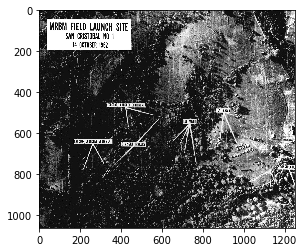

In [0]:
#plotting orginal image:
plt.imshow(gray_image, cmap='gray', vmin=np.amin(gray_image), vmax=np.amax(gray_image))

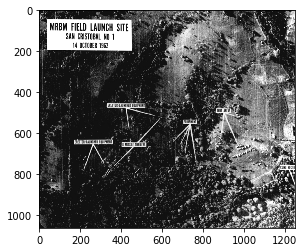

In [0]:
#plotting convolution heat map:
plt.imshow(conv_output, cmap='gray', vmin=np.amin(conv_output), vmax=np.amax(conv_output))